# Python Quiz

__Name: ZHOU DUO__

__Matriculation Number: G2103160J__

__Device: Macbook Air with Apple Silicon, so it may not operate well in Windows Devices__

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,VotingClassifier

from math import sqrt
import os
os.getcwd()

'/Users/clause/Desktop/PyQuiz'

In [2]:
df = pd.read_excel('Client_default.xlsx', sheet_name = None)

/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/openpyxl/reader/workbook.py:88: UserWarning: File contains an invalid specification for Data. This will be removed
  warn(msg)


In [3]:
print(list(df.keys()))

[]


Since the worksheet cannot be correctly identified, I can only convert the xlsx file into a csv file for reading.

In [4]:
df = pd.read_csv('Client_default.csv', index_col = 'CUSTOMER ID')

In [5]:
df

,AGE,GENDER,EDUCATION,MARRIAGE,PAYMENT_1M,PAYMENT_2M,PAYMENT_3M,PAYMENT_4M,PAYMENT_5M,PAYMENT_6M,...,BILLAMOUNT_4M,BILLAMOUNT_5M,BILLAMOUNT_6M,AMOUNTPAID_1M,AMOUNTPAID_2M,AMOUNTPAID_3M,AMOUNTPAID_4M,AMOUNTPAID_5M,AMOUNTPAID_6M,DEFAULT_PAYMENT_NEXT_MONTH
CUSTOMER ID,,,,,,,,,,,,,,,,,,,,,
1,24,female,University,married,2.0,2.0,-1,-1.0,-2.0,-2.0,...,0,0,0.0,0.0,689.0,0.0,0,0.0,0.0,yes
2,26,female,University,single,-1.0,2.0,0,0.0,0.0,2.0,...,3272,3455,3261.0,0.0,1000.0,1000.0,1000,0.0,2000.0,yes
3,34,female,University,single,0.0,0.0,0,0.0,0.0,0.0,...,14331,14948,15549.0,1518.0,1500.0,1000.0,1000,1000.0,5000.0,no
4,37,female,University,married,0.0,0.0,0,0.0,0.0,0.0,...,28314,28959,29547.0,2000.0,2019.0,1200.0,1100,1069.0,1000.0,no
5,57,male,University,married,-1.0,0.0,-1,0.0,0.0,0.0,...,20940,19146,19131.0,2000.0,36681.0,10000.0,9000,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,39,male,highschool,married,0.0,0.0,0,0.0,0.0,0.0,...,88004,31237,15980.0,8500.0,20000.0,5003.0,3047,5000.0,1000.0,no
29997,43,male,highschool,single,-1.0,-1.0,-1,-1.0,0.0,0.0,...,8979,5190,0.0,1837.0,3526.0,8998.0,129,0.0,0.0,no
29998,37,male,University,single,4.0,3.0,2,-1.0,0.0,0.0,...,20878,20582,19357.0,0.0,0.0,22000.0,4200,2000.0,3100.0,yes


In [6]:
df.shape

(30000, 23)

View data statistics

In [7]:
df.isna().sum().sum()

789

There are missing values, so we need to do missing value processing

In [8]:
df.isnull().sum() # # of columns

AGE                             0
GENDER                          1
EDUCATION                     454
MARRIAGE                      323
PAYMENT_1M                      1
PAYMENT_2M                      1
PAYMENT_3M                      0
PAYMENT_4M                      1
PAYMENT_5M                      1
PAYMENT_6M                      1
BILLAMOUNT_1M                   0
BILLAMOUNT_2M                   0
BILLAMOUNT_3M                   0
BILLAMOUNT_4M                   0
BILLAMOUNT_5M                   0
BILLAMOUNT_6M                   1
AMOUNTPAID_1M                   1
AMOUNTPAID_2M                   1
AMOUNTPAID_3M                   1
AMOUNTPAID_4M                   0
AMOUNTPAID_5M                   1
AMOUNTPAID_6M                   1
DEFAULT_PAYMENT_NEXT_MONTH      0
dtype: int64

In [9]:
df.count() # 统计列的非NaN个数

AGE                           30000
GENDER                        29999
EDUCATION                     29546
MARRIAGE                      29677
PAYMENT_1M                    29999
PAYMENT_2M                    29999
PAYMENT_3M                    30000
PAYMENT_4M                    29999
PAYMENT_5M                    29999
PAYMENT_6M                    29999
BILLAMOUNT_1M                 30000
BILLAMOUNT_2M                 30000
BILLAMOUNT_3M                 30000
BILLAMOUNT_4M                 30000
BILLAMOUNT_5M                 30000
BILLAMOUNT_6M                 29999
AMOUNTPAID_1M                 29999
AMOUNTPAID_2M                 29999
AMOUNTPAID_3M                 29999
AMOUNTPAID_4M                 30000
AMOUNTPAID_5M                 29999
AMOUNTPAID_6M                 29999
DEFAULT_PAYMENT_NEXT_MONTH    30000
dtype: int64

In [10]:
df.isna().sum(1) # 每行有多少个缺失值

CUSTOMER ID
1        0
2        0
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Length: 30000, dtype: int64

In [11]:
df.loc[df.isna().any(1)] # 返回有缺失的行

,AGE,GENDER,EDUCATION,MARRIAGE,PAYMENT_1M,PAYMENT_2M,PAYMENT_3M,PAYMENT_4M,PAYMENT_5M,PAYMENT_6M,...,BILLAMOUNT_4M,BILLAMOUNT_5M,BILLAMOUNT_6M,AMOUNTPAID_1M,AMOUNTPAID_2M,AMOUNTPAID_3M,AMOUNTPAID_4M,AMOUNTPAID_5M,AMOUNTPAID_6M,DEFAULT_PAYMENT_NEXT_MONTH
CUSTOMER ID,,,,,,,,,,,,,,,,,,,,,
16,23,female,highschool,NaN,1.0,2.0,0,0.0,0.0,0.0,...,28771,29531,30211.0,0.0,1500.0,1100.0,1200,1300.0,1100.0,no
19,49,female,MasterPhD,married,1.0,-2.0,-2,-2.0,-2.0,-2.0,...,0,0,NaN,0.0,0.0,0.0,0,0.0,0.0,no
46,29,male,MasterPhD,single,-2.0,-2.0,-2,-2.0,-2.0,-2.0,...,0,0,0.0,NaN,0.0,0.0,0,0.0,0.0,yes
48,46,female,NaN,single,0.0,0.0,-1,0.0,0.0,-2.0,...,1170,0,0.0,1013.0,1170.0,0.0,0,0.0,0.0,yes
52,43,female,highschool,NaN,0.0,0.0,0,0.0,0.0,0.0,...,39619,35762,33258.0,2000.0,1606.0,1500.0,2000,1500.0,1000.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29840,36,male,NaN,married,0.0,0.0,0,0.0,0.0,0.0,...,136378,139219,142172.0,5500.0,3800.0,3900.0,4000,4100.0,4100.0,no
29848,46,male,NaN,married,-1.0,-1.0,-1,-1.0,-1.0,-1.0,...,91238,18293,14332.0,10414.0,21229.0,91254.0,18293,14332.0,15785.0,no
29921,45,male,NaN,married,2.0,0.0,0,0.0,0.0,0.0,...,50947,51020,0.0,3000.0,3428.0,2002.0,1023,0.0,0.0,yes


In [12]:
print(f'As you can see, there are only {781/30000*100}% rows with missing values, and the impact is relatively small, so just delete it.')

As you can see, there are only 2.603333333333333% rows with missing values, and the impact is relatively small, so just delete it.


In [13]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(f'Then, there are {df.isna().sum().sum()} missing values ')

Then, there are 0 missing values 


In [14]:
df

,AGE,GENDER,EDUCATION,MARRIAGE,PAYMENT_1M,PAYMENT_2M,PAYMENT_3M,PAYMENT_4M,PAYMENT_5M,PAYMENT_6M,...,BILLAMOUNT_4M,BILLAMOUNT_5M,BILLAMOUNT_6M,AMOUNTPAID_1M,AMOUNTPAID_2M,AMOUNTPAID_3M,AMOUNTPAID_4M,AMOUNTPAID_5M,AMOUNTPAID_6M,DEFAULT_PAYMENT_NEXT_MONTH
CUSTOMER ID,,,,,,,,,,,,,,,,,,,,,
1,24,female,University,married,2.0,2.0,-1,-1.0,-2.0,-2.0,...,0,0,0.0,0.0,689.0,0.0,0,0.0,0.0,yes
2,26,female,University,single,-1.0,2.0,0,0.0,0.0,2.0,...,3272,3455,3261.0,0.0,1000.0,1000.0,1000,0.0,2000.0,yes
3,34,female,University,single,0.0,0.0,0,0.0,0.0,0.0,...,14331,14948,15549.0,1518.0,1500.0,1000.0,1000,1000.0,5000.0,no
4,37,female,University,married,0.0,0.0,0,0.0,0.0,0.0,...,28314,28959,29547.0,2000.0,2019.0,1200.0,1100,1069.0,1000.0,no
5,57,male,University,married,-1.0,0.0,-1,0.0,0.0,0.0,...,20940,19146,19131.0,2000.0,36681.0,10000.0,9000,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,39,male,highschool,married,0.0,0.0,0,0.0,0.0,0.0,...,88004,31237,15980.0,8500.0,20000.0,5003.0,3047,5000.0,1000.0,no
29997,43,male,highschool,single,-1.0,-1.0,-1,-1.0,0.0,0.0,...,8979,5190,0.0,1837.0,3526.0,8998.0,129,0.0,0.0,no
29998,37,male,University,single,4.0,3.0,2,-1.0,0.0,0.0,...,20878,20582,19357.0,0.0,0.0,22000.0,4200,2000.0,3100.0,yes


In [15]:
df.info

<bound method DataFrame.info of              AGE  GENDER   EDUCATION MARRIAGE  PAYMENT_1M  PAYMENT_2M  \
CUSTOMER ID                                                             
1             24  female  University  married         2.0         2.0   
2             26  female  University   single        -1.0         2.0   
3             34  female  University   single         0.0         0.0   
4             37  female  University  married         0.0         0.0   
5             57    male  University  married        -1.0         0.0   
...          ...     ...         ...      ...         ...         ...   
29996         39    male  highschool  married         0.0         0.0   
29997         43    male  highschool   single        -1.0        -1.0   
29998         37    male  University   single         4.0         3.0   
29999         41    male  highschool  married         1.0        -1.0   
30000         46    male  University  married         0.0         0.0   

             PAYME

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,29219.0,35.396078,9.180086,21.0,28.0,34.0,41.0,79.0
PAYMENT_1M,29219.0,-0.015504,1.126048,-2.0,-1.0,0.0,0.0,8.0
PAYMENT_2M,29219.0,-0.130497,1.201361,-2.0,-1.0,0.0,0.0,8.0
PAYMENT_3M,29219.0,-0.163353,1.201189,-2.0,-1.0,0.0,0.0,8.0
PAYMENT_4M,29219.0,-0.218351,1.172957,-2.0,-1.0,0.0,0.0,8.0
PAYMENT_5M,29219.0,-0.263630,1.137634,-2.0,-1.0,0.0,0.0,8.0
PAYMENT_6M,29219.0,-0.288237,1.153294,-2.0,-1.0,0.0,0.0,8.0
BILLAMOUNT_1M,29219.0,50975.118382,73441.475342,-165580.0,3493.5,22259.0,66642.5,964511.0
BILLAMOUNT_2M,29219.0,49003.138164,71036.587857,-69777.0,2948.5,21087.0,63613.5,983931.0
BILLAMOUNT_3M,29219.0,46873.168692,69240.520014,-157264.0,2624.0,20042.0,59874.0,1664089.0


<AxesSubplot:xlabel='DEFAULT_PAYMENT_NEXT_MONTH', ylabel='count'>

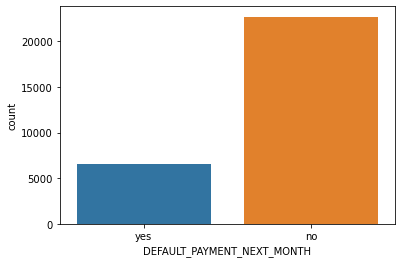

In [17]:
sns.countplot(x = 'DEFAULT_PAYMENT_NEXT_MONTH', data = df)

## 1. Conduct exploratory data analytics to handle missing values and conduct visualizations to understand which features are related to the target variable.

### Preprocessing

In [18]:
prep_df = df.copy()

In [19]:
prep_df.dtypes

AGE                             int64
GENDER                         object
EDUCATION                      object
MARRIAGE                       object
PAYMENT_1M                    float64
PAYMENT_2M                    float64
PAYMENT_3M                      int64
PAYMENT_4M                    float64
PAYMENT_5M                    float64
PAYMENT_6M                    float64
BILLAMOUNT_1M                   int64
BILLAMOUNT_2M                   int64
BILLAMOUNT_3M                   int64
BILLAMOUNT_4M                   int64
BILLAMOUNT_5M                   int64
BILLAMOUNT_6M                 float64
AMOUNTPAID_1M                 float64
AMOUNTPAID_2M                 float64
AMOUNTPAID_3M                 float64
AMOUNTPAID_4M                   int64
AMOUNTPAID_5M                 float64
AMOUNTPAID_6M                 float64
DEFAULT_PAYMENT_NEXT_MONTH     object
dtype: object

In [20]:
print("Sex", prep_df.GENDER.unique())
print('Education', prep_df.EDUCATION.unique())
print('Marriage', prep_df.MARRIAGE.unique())
print('obj', prep_df.DEFAULT_PAYMENT_NEXT_MONTH.unique())

Sex ['female' 'male']
Education ['University' 'MasterPhD' 'highschool' '0']
Marriage ['married' 'single' '0']
obj ['yes' 'no']


In [21]:
prep_df.GENDER = prep_df.GENDER.map({'male':1, 'female':-1})
prep_df.EDUCATION = prep_df.EDUCATION.map({'University':2, 'MasterPhD':4, 'highschool':1, '0':0})
prep_df.MARRIAGE = prep_df.MARRIAGE.map({'married':2, 'single':1, '0':0})
prep_df.DEFAULT_PAYMENT_NEXT_MONTH = prep_df.DEFAULT_PAYMENT_NEXT_MONTH.map({'yes':1, 'no':0})
#prep_df.drop("DEFAULT_PAYMENT_NEXT_MONTH", axis=1)

In [22]:
prep_df

,AGE,GENDER,EDUCATION,MARRIAGE,PAYMENT_1M,PAYMENT_2M,PAYMENT_3M,PAYMENT_4M,PAYMENT_5M,PAYMENT_6M,...,BILLAMOUNT_4M,BILLAMOUNT_5M,BILLAMOUNT_6M,AMOUNTPAID_1M,AMOUNTPAID_2M,AMOUNTPAID_3M,AMOUNTPAID_4M,AMOUNTPAID_5M,AMOUNTPAID_6M,DEFAULT_PAYMENT_NEXT_MONTH
CUSTOMER ID,,,,,,,,,,,,,,,,,,,,,
1,24,-1,2,2,2.0,2.0,-1,-1.0,-2.0,-2.0,...,0,0,0.0,0.0,689.0,0.0,0,0.0,0.0,1
2,26,-1,2,1,-1.0,2.0,0,0.0,0.0,2.0,...,3272,3455,3261.0,0.0,1000.0,1000.0,1000,0.0,2000.0,1
3,34,-1,2,1,0.0,0.0,0,0.0,0.0,0.0,...,14331,14948,15549.0,1518.0,1500.0,1000.0,1000,1000.0,5000.0,0
4,37,-1,2,2,0.0,0.0,0,0.0,0.0,0.0,...,28314,28959,29547.0,2000.0,2019.0,1200.0,1100,1069.0,1000.0,0
5,57,1,2,2,-1.0,0.0,-1,0.0,0.0,0.0,...,20940,19146,19131.0,2000.0,36681.0,10000.0,9000,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,39,1,1,2,0.0,0.0,0,0.0,0.0,0.0,...,88004,31237,15980.0,8500.0,20000.0,5003.0,3047,5000.0,1000.0,0
29997,43,1,1,1,-1.0,-1.0,-1,-1.0,0.0,0.0,...,8979,5190,0.0,1837.0,3526.0,8998.0,129,0.0,0.0,0
29998,37,1,2,1,4.0,3.0,2,-1.0,0.0,0.0,...,20878,20582,19357.0,0.0,0.0,22000.0,4200,2000.0,3100.0,1


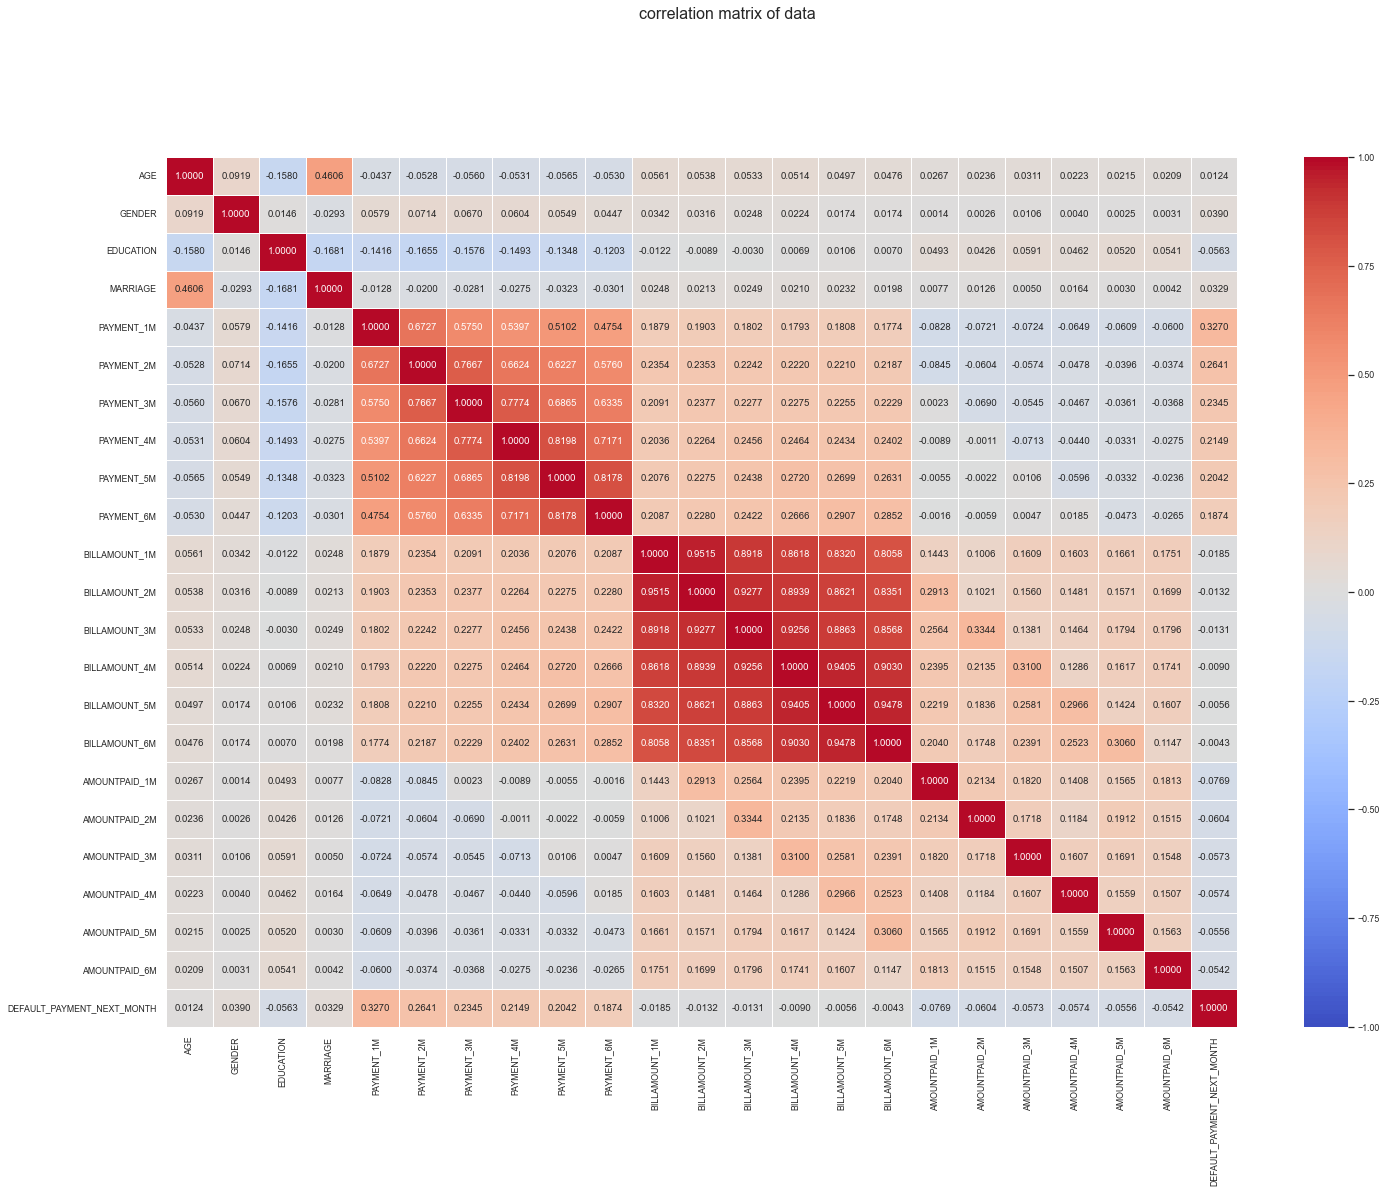

In [23]:
df_corr = prep_df.corr()

sns.set(font_scale=0.8)
plt.figure(figsize=(24,16))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("coolwarm", 200))

plt.figtext(.45, 1,f'correlation matrix of data', fontsize=16, ha='center')
plt.xticks(rotation=90)
plt.show()

/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


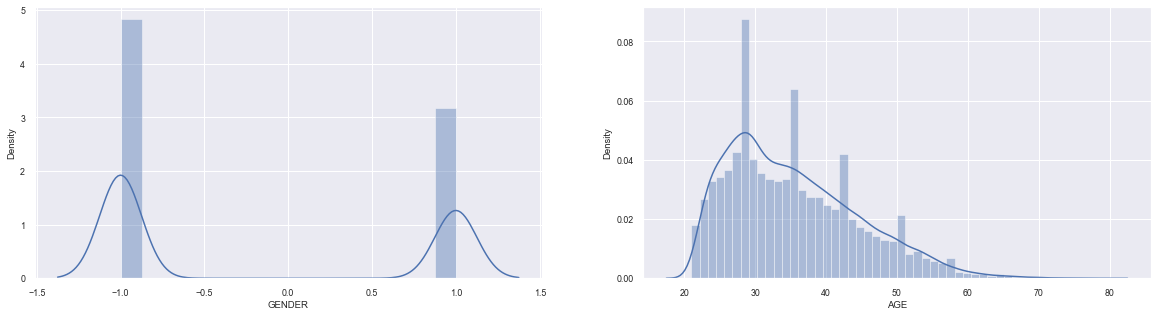

In [24]:
plt.subplots(figsize=(20,5))

plt.subplot(121)
sns.distplot(prep_df.GENDER)

plt.subplot(122)
sns.distplot(prep_df.AGE)

plt.show()

/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


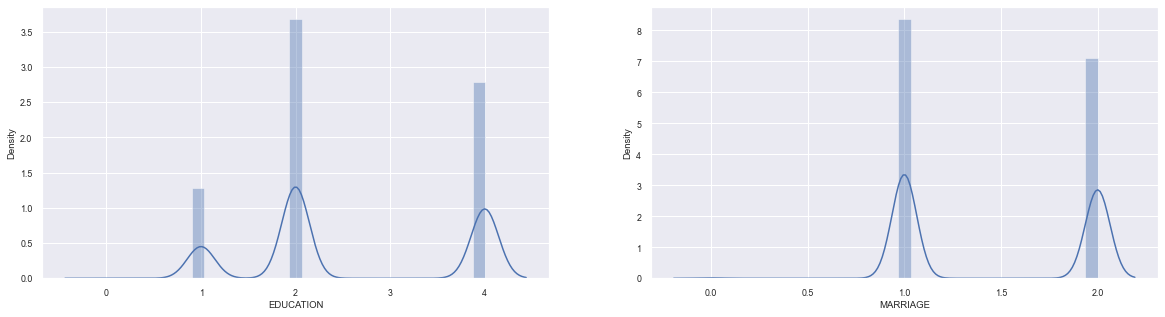

In [25]:
plt.subplots(figsize=(20,5))

plt.subplot(121)
sns.distplot(prep_df.EDUCATION)

plt.subplot(122)
sns.distplot(prep_df.MARRIAGE)

plt.show()

/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


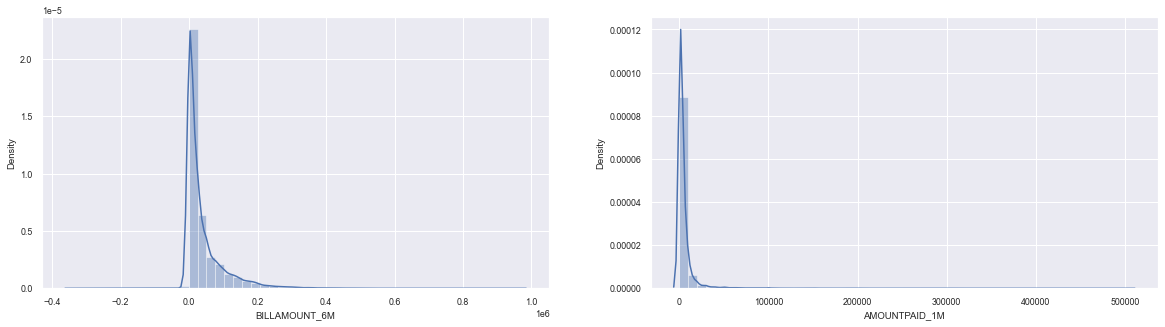

In [26]:
plt.subplots(figsize=(20,5))

plt.subplot(121)
sns.distplot(prep_df.BILLAMOUNT_6M)

plt.subplot(122)
sns.distplot(prep_df.AMOUNTPAID_1M)

plt.show()

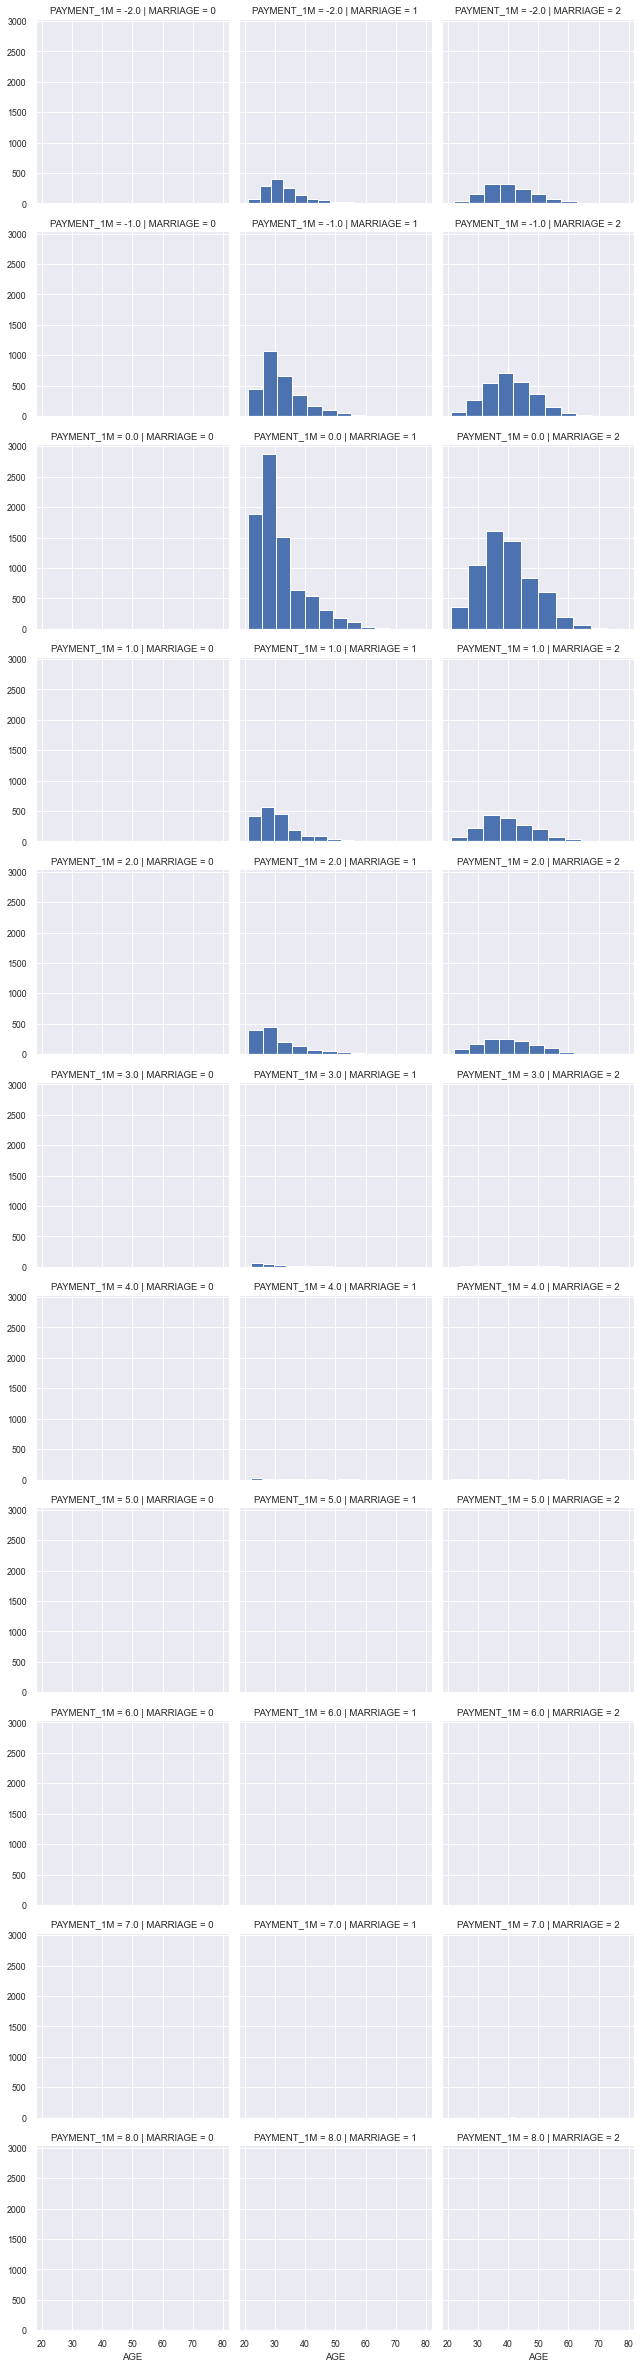

In [27]:
g = sns.FacetGrid(prep_df, row='PAYMENT_1M', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

In [28]:
y = prep_df["DEFAULT_PAYMENT_NEXT_MONTH"]
X = prep_df.drop("DEFAULT_PAYMENT_NEXT_MONTH", axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 3. Perform feature engineering(including both featurese lection and new feature creation) to show if there are some performance differences using selected subset of features or newly added features. Note it is ok that performance does not improve given limited quiz time, but you should try feature engineering process.

I plan to aggregate several of the same time units so that I can see the monthly growth trend, but I don’t have much time and can only do a SMOTE.

In [30]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(sampling_strategy='auto', k_neighbors=5, n_jobs=-1)
X_train, y_train = oversampler.fit_resample(X_train,y_train)

/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEFAULT_PAYMENT_NEXT_MONTH', ylabel='count'>

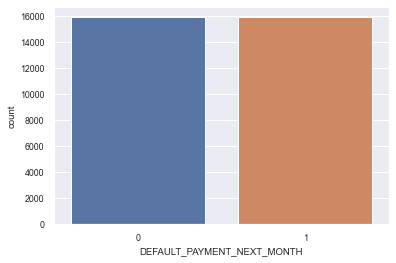

In [31]:
sns.countplot(y_train)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Build   (youmayconsideravoidingSVMasitcould be very slow) and   under 5-fold cross-validation (5FCV), and report their average Accuracy, MCC, Precision (for class Y=1), Recall (for class Y=1), F1-measure (for class Y=1).

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.layer_1 = nn.Linear(22, 64)
        self.layer_2 = nn.Linear(64, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p = 0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [34]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        self.len = len(y_data)
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.X_data)
    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
    
    def __len__(self):
        return len(self.X_data)

In [35]:
# k fold     
def get_k_fold_data(k, i, X, y): 
    # Return the training and verification data needed for the i-th fold cross-validation, 
    # X_train is the training data, X_valid is the verification data
    assert k > 1
    # All data / nuber of fold
    fold_size = X.shape[0] // k  
    
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # slice(start,end,step) 
        # idx is the valid of every folds
        X_part, y_part = X[idx, :], y[idx]
        if j == i: # valid of #i fold
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part), dim=0) #dim=0, add row, link by column
            y_train = torch.cat((y_train, y_part), dim=0)
    #print(X_train.size(),X_valid.size())
    return X_train, y_train, X_valid,y_valid 

In [36]:
def k_fold(k, X_train, y_train, num_epochs=50,learning_rate=0.001, weight_decay=0, batch_size=64):
    
    # train set part
    train_loss_sum, valid_loss_sum = 0, 0
    train_acc_sum ,valid_acc_sum = 0,0
    train_mcc_sum ,valid_mcc_sum = 0,0
    train_prec_sum ,valid_prec_sum = 0,0
    train_recall_sum ,valid_recall_sum = 0,0
    train_f1_sum ,valid_f1_sum = 0,0
    
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train) # get data after k-fold
        net =  Net()
        # train
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,\
                                   weight_decay, batch_size) 
        t_acc = float(train_ls[-1][1])
        v_acc = float(valid_ls[-1][1])
        t_mcc  = float(train_ls[-1][2])
        v_mcc = float(valid_ls[-1][2])
        t_prec  = float(train_ls[-1][3])
        v_prec = float(valid_ls[-1][3])
        t_recall  = float(train_ls[-1][4])
        v_recall = float(valid_ls[-1][4])
        t_f1  = float(train_ls[-1][5])
        v_f1 = float(valid_ls[-1][5])
        
        print('*'*25,'fold',i+1,'*'*25)
        print('train_loss:%.6f'%train_ls[-1][0],'train_acc:%.4f'%t_acc,'train_mcc:%.4f'%t_mcc, 'train_precison:%.4f'%t_prec,'train_recall:%.4f'%t_recall, 'train_f1:%.4f\n'%t_f1, \
              'valid loss:%.6f'%valid_ls[-1][0],'valid_acc:%.4f'%v_acc,'valid_mcc:%.4f'%v_mcc, 'valid_precison:%.4f'%v_prec,'valid_recall:%.4f'%v_recall, 'valid_f1:%.4f\n'%v_f1)
        
        train_loss_sum += train_ls[-1][0]
        valid_loss_sum += valid_ls[-1][0]
        train_acc_sum += t_acc
        valid_acc_sum += v_acc
        train_mcc_sum += t_mcc
        valid_mcc_sum += v_mcc
        train_mcc_sum += t_prec
        valid_mcc_sum += v_prec
        train_mcc_sum += t_recall
        valid_mcc_sum += v_recall
        train_mcc_sum += t_f1
        valid_mcc_sum += v_f1
    
    print('*'*25,'final result','*'*25) 
    print('train_loss_sum:%.4f'%(train_loss_sum/k),'train_acc_sum:%.4f'%(train_acc_sum/k),'train_mcc_sum:%.4f\n'%(train_mcc_sum/k),\
          'valid_loss_sum:%.4f'%(valid_loss_sum/k),'valid_acc_sum:%.4f'%(valid_acc_sum/k),'valid_mcc_sum:%.4f'%(valid_mcc_sum/k))
    
    # test set part
    test_data = testData(torch.FloatTensor(X_test))
    test_loader = DataLoader(dataset = test_data, batch_size = 1)
    y_pred_list = []
    net.eval()
    with torch.no_grad():
        for X_batch in test_loader:
            y_test_pred= net(X_batch)
            y_test_pred= torch.sigmoid(y_test_pred)
            y_pred_tag = torch.round(y_test_pred)
            y_pred_list.append(y_pred_tag.cpu().numpy())
        
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    cm, acc, mcc, prec, recall, f1 = evaluate(y_test, y_pred_list)
    print()
    print('Confusion Matrix of test set:')
    print(cm)
    print(f' Accurency:{acc}, MCC:{mcc}, Precision:{prec}, Recall:{recall}, F1:{f1}')

In [37]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate,weight_decay, batch_size):
    
    train_ls, test_ls = [], []
    
    dataset = trainData(train_features, train_labels) 
    train_iter = DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.Adam(params=net.parameters(), lr= learning_rate, weight_decay=weight_decay)
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        epoch_acc = 0
        for X, y in train_iter:  # train by batch
            output  = net(X)
            optimizer.zero_grad()
            loss = loss_func(output,y.unsqueeze(1))
            loss.backward()
            optimizer.step()
        
        # get loss & accuracy of each epoch
        train_ls.append(mcc(0,net, train_features, train_labels)) 
        if test_labels is not None:
            test_ls.append(mcc(1,net, test_features, test_labels))
    
    return train_ls, test_ls

In [38]:
def mcc(flag,net,x,y):
    if flag == 1: ### valid 数据集
        net.eval()
    else:
        net.train()
    #np.seterr(divide='ignore', invalid='ignore')
    output = net(x)
    result = torch.round(torch.sigmoid(output))
    loss = loss_func(output,y.unsqueeze(1))
    
    cm, acc, mcc, prec, recall, f1 = evaluate(y.detach().numpy(), result.detach().numpy())
    
    #print(cm)
    return (loss.data.item(), acc, mcc, prec, recall, f1)



In [39]:
def evaluate(x, y):
    cm = confusion_matrix(x, y)
    acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    upper = cm[0,0]*cm[1,1]-cm[0,1]*cm[1,0]
    lower = sqrt((cm[0,0]+cm[0,1])*(cm[0,0]+cm[1,0])*(cm[1,1]+cm[0,1])*(cm[1,1]+cm[1,0]))
    
    if (cm[0,0]+cm[0,1])*(cm[0,0]+cm[1,0])*(cm[1,1]+cm[0,1])*(cm[1,1]+cm[1,0]) == 0:
        mcc = 0
    else:
        mcc = upper / lower
    prec = cm[1,1] / (cm[1,1] + cm[1,0]) 
    recall = cm[1,1] / (cm[1,1] + cm[0,1]) 
    f1 = 2 * prec * recall/(prec + recall)
    return cm, acc, mcc, prec, recall, f1


In [40]:
x = torch.tensor(X_train.astype(np.float32))
label = torch.tensor(y_train.astype(np.float32))

In [41]:
loss_func = nn.BCEWithLogitsLoss()
k_fold(5, x, label)

************************* fold 1 *************************
train_loss:0.307370 train_acc:0.8632 train_mcc:0.7211 train_precison:0.9254 train_recall:0.8481 train_f1:0.8850
 valid loss:0.756028 valid_acc:0.7276 valid_mcc:0.3145 train_precison:0.5767 train_recall:0.4212 train_f1:0.4868

************************* fold 2 *************************
train_loss:0.381353 train_acc:0.8366 train_mcc:0.6702 train_precison:0.9368 train_recall:0.8074 train_f1:0.8673
 valid loss:0.630823 valid_acc:0.7623 valid_mcc:0.3656 train_precison:0.5779 train_recall:0.4686 train_f1:0.5175

************************* fold 3 *************************
train_loss:0.303564 train_acc:0.8640 train_mcc:0.7219 train_precison:0.9177 train_recall:0.8545 train_f1:0.8850
 valid loss:0.693342 valid_acc:0.7511 valid_mcc:0.3576 train_precison:0.5996 train_recall:0.4493 train_f1:0.5137

************************* fold 4 *************************
train_loss:0.330602 train_acc:0.8487 train_mcc:0.6866 train_precison:0.7820 train_reca

In [42]:
# Model Class to be used for different ML algorithms
class ClassifierModel(object):
    
    def __init__(self, clf, params=None):
        self.clf = clf(**params)
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)


def trainModel(model, x_train, y_train, x_test, n_folds):
    cv = KFold(n_splits= n_folds)
    scores1 = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    scores = cross_validate(model.clf, x_train, y_train, scoring=('accuracy','f1','precision', 'recall'), cv=cv, n_jobs=-1)
    return scores

In [43]:
 # Random Forest parameters
rf_params ={
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}

rfc_model = ClassifierModel(clf=RandomForestClassifier,params=rf_params)
rfc_scores = trainModel(rfc_model,X_train, y_train, X_test,5) 
rfc_scores

{'fit_time': array([8.04330993, 8.23870206, 8.13298774, 7.8584199 , 7.70603919]),
 'score_time': array([0.11548805, 0.12189007, 0.13078928, 0.14838195, 0.13259292]),
 'test_accuracy': array([0.75981162, 0.76997959, 0.7717067 , 0.74548595, 0.67514523]),
 'test_f1': array([0.52631579, 0.54881429, 0.52822842, 0.82537973, 0.80607367]),
 'test_precision': array([0.47169811, 0.48371336, 0.48251334, 0.9681577 , 1.        ]),
 'test_recall': array([0.5952381 , 0.6341637 , 0.58351254, 0.71930154, 0.67514523])}

In [44]:
 # Extra Trees Parameters
et_params={
    'n_jobs' : -1,
    'n_estimators' :400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}

etc_model = ClassifierModel(clf=ExtraTreesClassifier,params=et_params)

etc_scores = trainModel(etc_model,X_train, y_train, X_test,5)

etc_scores

{'fit_time': array([1.73703599, 1.74420881, 1.73592114, 1.73598695, 1.84910321]),
 'score_time': array([0.14374614, 0.11579919, 0.18262506, 0.12318301, 0.07920313]),
 'test_accuracy': array([0.68697017, 0.69241639, 0.70042393, 0.6462553 , 0.46836238]),
 'test_f1': array([0.47855649, 0.48703849, 0.48180337, 0.73602812, 0.63793841]),
 'test_precision': array([0.38188648, 0.38525269, 0.38784434, 0.9788096 , 1.        ]),
 'test_recall': array([0.6407563 , 0.66192171, 0.63584229, 0.5897484 , 0.46836238])}

In [45]:
 # AdaBoost parameters
ada_params={
    'n_estimators': 400,
    'learning_rate':0.65
}
ada_model = ClassifierModel(clf=AdaBoostClassifier,params=ada_params)

ada_scores = trainModel(etc_model,X_train, y_train, X_test,5)

ada_scores

{'fit_time': array([1.71097016, 1.6499722 , 1.71470809, 1.71766114, 1.7210989 ]),
 'score_time': array([0.12741685, 0.22428393, 0.12146091, 0.12596607, 0.12817883]),
 'test_accuracy': array([0.66970173, 0.6671377 , 0.68833412, 0.63667766, 0.47134558]),
 'test_f1': array([0.46463104, 0.47316103, 0.47721886, 0.72712264, 0.64070003]),
 'test_precision': array([0.36490807, 0.36349752, 0.37718568, 0.9774889 , 1.        ]),
 'test_recall': array([0.63935574, 0.67758007, 0.64946237, 0.57885843, 0.47134558])}

In [46]:
clf1 = RandomForestClassifier(n_estimators=10)
clf2 = ExtraTreesClassifier()
clf3 = AdaBoostClassifier

eclf = VotingClassifier(estimators=[('ada', clf1), ('etc', clf2), ('rfc', clf3)], voting='hard')

scores = cross_val_score(eclf, X_train, y_train)
eclf.fit(X_train, y_train)
pred_labels = eclf.predict(X_test)
print("average accuracy: ",scores.mean())
print("MCC: ",matthews_corrcoef(y_test,pred_labels))
cm = confusion_matrix(y_test, pred_labels)
print("Precision (for class Y=1): ",precision(cm))

print("Recall (for class Y=1)", recall_score(cm))

print("F1-measure (for class Y=1)", f1_score(cm))

/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/joblib/parallel.py", line 822, in dispatch_one_batch
    tasks = self._ready_batches.get(block=False)
  File "/Users/clause/miniforge3/envs/SG/lib/python3.8/queue.py", line 167, in get
    raise Empty
_queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/clause/miniforge3/envs/SG/lib/python3.8/site-packages/sklearn/

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

## 4. Based on your findings, using Markdown to summarize your major results and insights that you will present to the bank CEO.

This is a comparison of the prediction results before and after FE. Although MCC has decreased, considering the real business scenario, as a marketing analyst for a bank, we want to identify users whose credit cards may default but have not yet defaulted. Such classes will belong to False Positives users who are expected to default but do not make it. Therefore, in addition to TP and TN, we also prefer FP and work on reducing them.

So, the Recall increased, which provides the percentage of correctly predicted target customers increased. 
The Specificity gives us the percentage of non-target customers that are correctly predicted. 
The Precision increased, it provides us with the increase of efficiency of prediction because we can get as much TP with as few resources as possible.

Thus our work performance and efficiency have been obtained a great improvement.